# Kmeans clustering
Nel seguente notebook effettuiamo il clustering dei dati ottenuti. Si effettua prima uno scaling dei dati, poi un analisi del numero ottimale dei cluster e infine si effettua il clustering effettivo. Con il kmeans classico non si includono gli atributi categorici, perchè la funzione di distanza è predefinita e non personalizzabile


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df.head()


,CustomerID,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
0,17850.0,1707,21,12,4.335643,2.567,156.860294,5333.25,0.000000,0.0,0.0,0.000000
1,13047.0,1386,105,32,6.503112,2.567,356.232222,3206.09,35.000000,70.0,0.0,2.226424
2,12583.0,4992,113,360,6.504979,2.752,442.969333,6644.54,24.266667,72.0,0.0,2.235084
3,13748.0,439,24,80,4.494680,2.567,189.650000,948.25,55.400000,136.0,0.0,1.177965
4,15100.0,80,1,32,0.000000,2.567,292.000000,876.00,13.000000,32.0,0.0,0.918296


## Transformation

In [16]:
#Eliminiamo il client id null per adesso poi non ci sarà
df=df[df["CustomerID"].notnull()]
del df['CustomerID']
df.head()

,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
0,1707,21,12,4.335643,2.567,156.860294,5333.25,0.000000,0.0,0.0,0.000000
1,1386,105,32,6.503112,2.567,356.232222,3206.09,35.000000,70.0,0.0,2.226424
2,4992,113,360,6.504979,2.752,442.969333,6644.54,24.266667,72.0,0.0,2.235084
3,439,24,80,4.494680,2.567,189.650000,948.25,55.400000,136.0,0.0,1.177965
4,80,1,32,0.000000,2.567,292.000000,876.00,13.000000,32.0,0.0,0.918296


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:5])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 1.91294402e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.14991293e-02 1.91780822e-01
  1.91780822e-01 0.00000000e+00 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 2.38331533e-02 1.32968037e-01
  1.97260274e-01 0.00000000e+00 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.40005760e-03 3.03561644e-01
  3.72602740e-01 0.00000000e+00 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 3.14089047e-03 7.12328767e-02
  8.76712329e-02 0.00000000e+00 3.96772868e-01]]


## K-means
Con il kmenas classico stiamo utiizzando l'algoritmo kmeans++ che inizializza i centroidi in modo tale che siano distanti l'uno dall'altro, non in maniera random

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Ora possiamo vedere a quale cluster è stato assegnato ogni sample e anche i centroidi

In [20]:
print(kmeans.cluster_centers_)
print(kmeans.labels_[:5])

[[0.00318791 0.02972714 0.01604899 0.49175346 0.16442156 0.01298961
  0.00374179 0.47148054 0.53826717 0.         0.44291724]
 [0.0012337  0.02027883 0.00847256 0.38954931 0.16369931 0.01658571
  0.00191373 0.00993508 0.01054286 0.         0.00798074]
 [0.01240492 0.06029247 0.02417144 0.58250767 0.16349571 0.0151937
  0.01487692 0.20194013 0.23676563 0.         0.67546612]]
[1 2 2 0 1]


Plottiamo quati sample ci sono in ogni cluster

[ 785 3207 1583]


<BarContainer object of 3 artists>

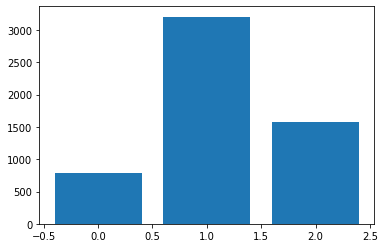

In [21]:
labels, counts = np.unique(kmeans.labels_, return_counts=True)
print(counts)
plt.bar(labels, counts, align='center')

Vediamo ora una visualizzazione 2d dei cluster assegnati. Questo è solo un esempio bisogna trovare qualcosa di significativo

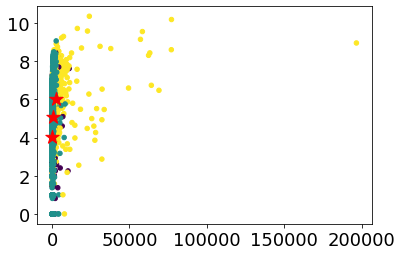

In [22]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(df['I'], df['E'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()



Visualizzazione Parallel coordinates

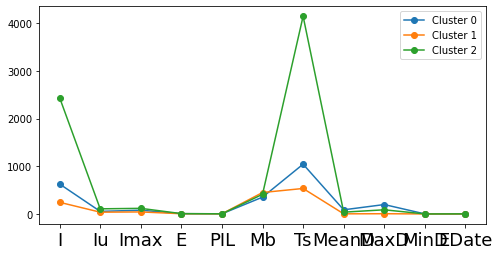

In [24]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

Spider plot

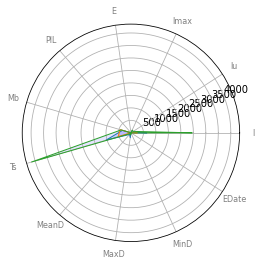

In [25]:
from math import pi
 
# number of variable
N = len(df.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

Metriche per la valutazione interne, senza altre fonti esterne

In [26]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

SSE 357.7673851273545
Silhouette 0.5338460971692808
Separation 0.9673504418385587


Da fare: Aggiungere categorie eliminate e valutazione

## Knee method

In [12]:
sse_list = list()
max_k = 40
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

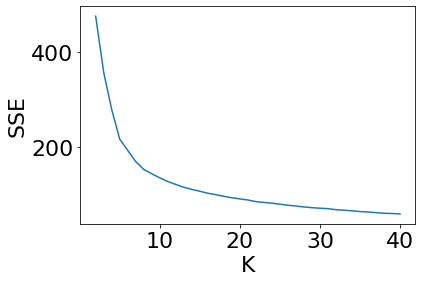

In [13]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()